In [4]:
import numpy as np
import pandas as pd

In [5]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv')

In [28]:
movies.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... release_date  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   2009-12-10   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   2007-05-19   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   2015-10-26   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   2012-07-16   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   2012-03-07   

      revenue  runtime                                   spoken_languages  \
0  2787965087    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   961000000    169.0           [{"iso_639_1": "en", "name": "English"}]   
2   880674609    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3  1084939099    165.0           [{"iso_639_1": "en", "name": "English"}]   
4   284139100    132.0           [{"iso_639_1": "en", "name": "English"}]   

     status                                         tagline  \
0  Released                     Enter the World of Pandora.   
1  Released  At the end of the world, the adventure begins.   
2  Released                           A Plan No One Escapes   
3  Released                                 The Legend Ends   
4  Released            Lost in our world, found in another.   

                                      title vote_average  vote_count  \
0                                    Avatar          7.2       11800   
1  Pirates of the Caribbean: At World's End          6.9        4500   
2                                   Spectre          6.3        4466   
3                     The Dark Knight Rises          7.6        9106   
4                               John Carter          6.1        2124   

                                      genre_list  
0  [Action, Adventure, Fantasy, Science Fiction]  
1                   [Adventure, Fantasy, Action]  
2                     [Action, Adventure, Crime]  
3               [Action, Crime, Drama, Thriller]  
4           [Action, Adventure, Science Fiction]  

[5 rows x 21 columns]

In [7]:
import numpy as np

# Simulate 1000 users interacting with random movies
num_users = 1000
sample_size = 5000
interactions = pd.DataFrame({
    'user_id': np.random.randint(1, num_users + 1, size=sample_size),
    'movie_id': np.random.choice(movies['id'], size=sample_size),
    'interaction_type': np.random.choice(['hover', 'partial_trailer', 'full_trailer'], size=sample_size, p=[0.4, 0.3, 0.3]),
})

# Simulate duration
def simulate_duration(row):
    if row['interaction_type'] == 'hover':
        return np.random.randint(1, 10)
    elif row['interaction_type'] == 'partial_trailer':
        return np.random.randint(10, 60)
    else:
        return np.random.randint(60, 180)

interactions['duration_sec'] = interactions.apply(simulate_duration, axis=1)

# Merge with movie titles
interactions = interactions.merge(movies[['id', 'title', 'genres']], left_on='movie_id', right_on='id')
print(interactions.head())


   user_id  movie_id interaction_type  duration_sec     id  \
0      841       650  partial_trailer            48    650   
1      468       320            hover             1    320   
2      609     13025  partial_trailer            58  13025   
3      991     51942            hover             5  51942   
4      945      8408     full_trailer            78   8408   

                         title  \
0              Boyz n the Hood   
1                     Insomnia   
2            Diary of the Dead   
3  I Married a Strange Person!   
4              Day of the Dead   

                                              genres  
0  [{"id": 80, "name": "Crime"}, {"id": 18, "name...  
1  [{"id": 80, "name": "Crime"}, {"id": 9648, "na...  
2  [{"id": 27, "name": "Horror"}, {"id": 28, "nam...  
3  [{"id": 18, "name": "Drama"}, {"id": 35, "name...  
4  [{"id": 27, "name": "Horror"}, {"id": 878, "na...  


In [8]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load pretrained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Clean overviews (drop nulls first)
movies = movies.dropna(subset=['overview'])

# Get overview embedding (mean pooling of last hidden states)
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1)  # average pooling
    return embedding.squeeze().numpy()

# Example (for first 5 movies)
overview_embeddings = np.array([get_bert_embedding(overview) for overview in movies['overview'].head(5)])

print("Shape of embeddings:", overview_embeddings.shape)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape of embeddings: (5, 768)


In [12]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert JSON-like string to list of genre names
def parse_genre(genre_str):
    try:
        return [g['name'] for g in ast.literal_eval(genre_str)]
    except:
        return []

# Apply parsing
movies['genre_list'] = movies['genres'].apply(parse_genre)

# One-hot encode genres
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genre_list'])

# Show shape and labels
print("Shape of genre matrix:", genre_matrix.shape)
print("Genre labels:", mlb.classes_)


Shape of genre matrix: (4800, 20)
Genre labels: ['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [14]:
import numpy as np

# Make sure BERT and genre matrix align in size (truncate for now if needed)
bert_features = overview_embeddings  # shape (5, 768)
genre_features = genre_matrix[:bert_features.shape[0]]  # shape (5, 20)

# Concatenate features: overview + genre
combined_features = np.hstack([bert_features, genre_features])
print("Combined feature matrix shape:", combined_features.shape)


Combined feature matrix shape: (5, 788)


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Simulate early interaction: user watched trailers of movie at index 1 and 3
watched_indices = [1, 3]
user_pref = combined_features[watched_indices].mean(axis=0).reshape(1, -1)

# Compute cosine similarity
similarities = cosine_similarity(user_pref, combined_features)[0]

# Rank top-N (excluding already watched)
recommended_indices = similarities.argsort()[::-1]  # descending
recommended_indices = [i for i in recommended_indices if i not in watched_indices][:3]

# Show recommendations
print("Recommended movie indices:", recommended_indices)
print("\nRecommended movie titles:")
print(movies.iloc[recommended_indices][['title', 'genre_list']])


Recommended movie indices: [np.int64(4), np.int64(0), np.int64(2)]

Recommended movie titles:
         title                                     genre_list
4  John Carter           [Action, Adventure, Science Fiction]
0       Avatar  [Action, Adventure, Fantasy, Science Fiction]
2      Spectre                     [Action, Adventure, Crime]


In [18]:
# Step 1: Get interactions for a user who matched the embedded movie IDs
valid_interactions[['user_id', 'movie_id', 'interaction_type']].drop_duplicates()
user_interactions = interactions[interactions['user_id'] == target_user]

# Step 2: Create interaction weights and user profile
interaction_weights = {
    'hover': 0.2,
    'partial_trailer': 0.5,
    'full_trailer': 1.0
}

user_vectors = []
weights = []

for _, row in user_interactions.iterrows():
    try:
        movie_index = movies[movies['id'] == row['movie_id']].index[0]
        vector = combined_features[movie_index]
        weight = interaction_weights.get(row['interaction_type'], 0.3)
        user_vectors.append(vector * weight)
        weights.append(weight)
    except:
        pass

# Step 3: Recommend if valid
from sklearn.metrics.pairwise import cosine_similarity
if user_vectors and np.sum(weights) != 0:
    user_profile = np.sum(user_vectors, axis=0) / np.sum(weights)
    similarities = cosine_similarity([user_profile], combined_features)[0]
    watched = user_interactions['movie_id'].tolist()
    recommended_indices = similarities.argsort()[::-1]
    recommended_indices = [i for i in recommended_indices if movies.iloc[i]['id'] not in watched][:5]
    print(f"\n🎯 Top recommendations for user {target_user}:")
    print(movies.iloc[recommended_indices][['title', 'genre_list']])
else:
    print(f"\n⚠️ No valid movie interactions found for user {target_user}. Try another user.")


NameError: name 'valid_interactions' is not defined

In [19]:
# Get the list of embedded movie IDs (same top 5 movies used in embedding)
embedded_movie_ids = movies.head(5)['id'].tolist()

# Find user interactions that match those movies
valid_interactions = interactions[interactions['movie_id'].isin(embedded_movie_ids)]

# Display user_ids who interacted with those movies
print(valid_interactions[['user_id', 'movie_id', 'interaction_type']].drop_duplicates())


      user_id  movie_id interaction_type
1075      754     19995            hover
1409       49     49529  partial_trailer
1977      178       285            hover
2205      787     49026            hover
3074      601       285  partial_trailer
3658      618     49026     full_trailer
3670      171       285            hover


In [22]:
target_user = 618
user_interactions = interactions[interactions['user_id'] == target_user]


In [29]:
# Step 2: Create interaction weights and build user profile
interaction_weights = {
    'hover': 0.2,
    'partial_trailer': 0.5,
    'full_trailer': 1.0
}

user_vectors = []
weights = []

for _, row in user_interactions.iterrows():
    try:
        movie_index = movies[movies['id'] == row['movie_id']].index[0]
        vector = combined_features[movie_index]
        weight = interaction_weights.get(row['interaction_type'], 0.3)
        user_vectors.append(vector * weight)
        weights.append(weight)
    except:
        pass

# Step 3: Recommend if valid
from sklearn.metrics.pairwise import cosine_similarity
if user_vectors and np.sum(weights) != 0:
    user_profile = np.sum(user_vectors, axis=0) / np.sum(weights)
    similarities = cosine_similarity([user_profile], combined_features)[0]
    watched = user_interactions['movie_id'].tolist()
    recommended_indices = similarities.argsort()[::-1]
    recommended_indices = [i for i in recommended_indices if movies.iloc[i]['id'] not in watched][:5]
    print(f"\n🎯 Top recommendations for user {target_user}:")
    print(movies.iloc[recommended_indices][['title', 'genre_list']])
else:
    print(f"\n⚠️ No valid movie interactions found for user {target_user}. Try another user.")



🎯 Top recommendations for user 618:
                                      title  \
2                                   Spectre   
4                               John Carter   
1  Pirates of the Caribbean: At World's End   
0                                    Avatar   

                                      genre_list  
2                     [Action, Adventure, Crime]  
4           [Action, Adventure, Science Fiction]  
1                   [Adventure, Fantasy, Action]  
0  [Action, Adventure, Fantasy, Science Fiction]  


In [30]:
# Get first 5 embedded movie IDs
embedded_ids = movies.head(5)['id'].tolist()

# Find valid users
valid = interactions[interactions['movie_id'].isin(embedded_ids)]
print(valid[['user_id', 'movie_id', 'interaction_type']].drop_duplicates())


      user_id  movie_id interaction_type
1075      754     19995            hover
1409       49     49529  partial_trailer
1977      178       285            hover
2205      787     49026            hover
3074      601       285  partial_trailer
3658      618     49026     full_trailer
3670      171       285            hover


In [31]:
movies = movies.head(500)

In [32]:
import numpy as np
import ast
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import MultiLabelBinarizer
import torch

# Filter and keep 500 movies
movies = movies.dropna(subset=['overview']).head(500)

# Load BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# BERT Embedding Function
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Compute BERT embeddings
overview_embeddings = np.array([get_bert_embedding(overview) for overview in movies['overview']])

# Parse genres and encode
def parse_genres(genre_str):
    try:
        return [g['name'] for g in ast.literal_eval(genre_str)]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(parse_genres)
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genre_list'])

# Combine overview + genre
combined_features = np.hstack([overview_embeddings, genre_matrix])
print("✅ Combined features shape:", combined_features.shape)


✅ Combined features shape: (500, 786)


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Choose any user ID (real or simulated)
target_user = 601  # You can replace with any valid user_id from `interactions`

# Get their interactions
user_interactions = interactions[interactions['user_id'] == target_user]

# Define weights for interaction types
interaction_weights = {
    'hover': 0.2,
    'partial_trailer': 0.5,
    'full_trailer': 1.0
}

# Build user profile vector
user_vectors = []
weights = []

for _, row in user_interactions.iterrows():
    try:
        movie_index = movies[movies['id'] == row['movie_id']].index[0]
        vector = combined_features[movie_index]
        weight = interaction_weights.get(row['interaction_type'], 0.3)
        user_vectors.append(vector * weight)
        weights.append(weight)
    except:
        pass

if user_vectors and np.sum(weights) != 0:
    user_profile = np.sum(user_vectors, axis=0) / np.sum(weights)

    # Compare to all movie vectors
    similarities = cosine_similarity([user_profile], combined_features)[0]

    watched_ids = user_interactions['movie_id'].tolist()
    recommended_indices = similarities.argsort()[::-1]
    recommended_indices = [i for i in recommended_indices if movies.iloc[i]['id'] not in watched_ids][:5]

    print(f"\n🎯 Top recommendations for user {target_user}:")
    print(movies.iloc[recommended_indices][['title', 'genre_list']])
else:
    print(f"⚠️ No matching movie interactions for user {target_user}")



🎯 Top recommendations for user 601:
                   title                                      genre_list
10      Superman Returns   [Adventure, Fantasy, Action, Science Fiction]
193          After Earth            [Science Fiction, Action, Adventure]
133         Dark Shadows                               [Comedy, Fantasy]
228             Oblivion   [Action, Science Fiction, Adventure, Mystery]
125  The Matrix Reloaded  [Adventure, Action, Thriller, Science Fiction]


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_movies(user_id, top_k=5):
    user_interactions = interactions[interactions['user_id'] == user_id]

    interaction_weights = {
        'hover': 0.2,
        'partial_trailer': 0.5,
        'full_trailer': 1.0
    }

    user_vectors = []
    weights = []

    for _, row in user_interactions.iterrows():
        try:
            movie_index = movies[movies['id'] == row['movie_id']].index[0]
            vector = combined_features[movie_index]
            weight = interaction_weights.get(row['interaction_type'], 0.3)
            user_vectors.append(vector * weight)
            weights.append(weight)
        except:
            pass

    if user_vectors and np.sum(weights) != 0:
        user_profile = np.sum(user_vectors, axis=0) / np.sum(weights)
        similarities = cosine_similarity([user_profile], combined_features)[0]
        watched_ids = user_interactions['movie_id'].tolist()
        recommended_indices = similarities.argsort()[::-1]
        recommended_indices = [i for i in recommended_indices if movies.iloc[i]['id'] not in watched_ids][:top_k]
        print(f"\n🎯 Top {top_k} recommendations for user {user_id}:")
        return movies.iloc[recommended_indices][['title', 'genre_list']]
    else:
        print(f"⚠️ No matching movie interactions found for user {user_id}")
        return pd.DataFrame()


In [35]:
recommend_movies(601)


🎯 Top 5 recommendations for user 601:


title                                      genre_list
10      Superman Returns   [Adventure, Fantasy, Action, Science Fiction]
193          After Earth            [Science Fiction, Action, Adventure]
133         Dark Shadows                               [Comedy, Fantasy]
228             Oblivion   [Action, Science Fiction, Adventure, Mystery]
125  The Matrix Reloaded  [Adventure, Action, Thriller, Science Fiction]

In [36]:
def precision_at_k(user_id, top_k=5):
    recommendations = recommend_movies(user_id, top_k)
    
    # Ground truth: movies the user interacted with using 'full_trailer'
    actual = interactions[
        (interactions['user_id'] == user_id) &
        (interactions['interaction_type'] == 'full_trailer')
    ]['movie_id'].tolist()

    if recommendations.empty or not actual:
        print("⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.")
        return None

    recommended_ids = movies.iloc[recommendations.index]['id'].tolist()
    hits = [movie_id for movie_id in recommended_ids if movie_id in actual]
    precision = len(hits) / top_k

    print(f"🎯 Precision@{top_k} for user {user_id}: {precision:.2f}")
    return precision


In [37]:
precision_at_k(601)



🎯 Top 5 recommendations for user 601:
🎯 Precision@5 for user 601: 0.00


0.0

In [38]:
valid_users = interactions['user_id'].unique().tolist()[:50]

scores = []
for uid in valid_users:
    score = precision_at_k(uid)
    if score is not None:
        scores.append(score)

print(f"\n📊 Average Precision@5 over {len(scores)} users: {np.mean(scores):.2f}")


⚠️ No matching movie interactions found for user 841
⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.
⚠️ No matching movie interactions found for user 468
⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.

🎯 Top 5 recommendations for user 609:
🎯 Precision@5 for user 609: 0.00

🎯 Top 5 recommendations for user 991:
🎯 Precision@5 for user 991: 0.00

🎯 Top 5 recommendations for user 945:
🎯 Precision@5 for user 945: 0.00
⚠️ No matching movie interactions found for user 45
⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.

🎯 Top 5 recommendations for user 129:
🎯 Precision@5 for user 129: 0.00
⚠️ No matching movie interactions found for user 197
⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.
⚠️ No matching movie interactions found for user 111
⚠️ Cannot evaluate — user has no full_trailer interactions or no recommendations.
⚠️ No matching movie interactions foun

In [40]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 5.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26544\2107903891.py:59: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


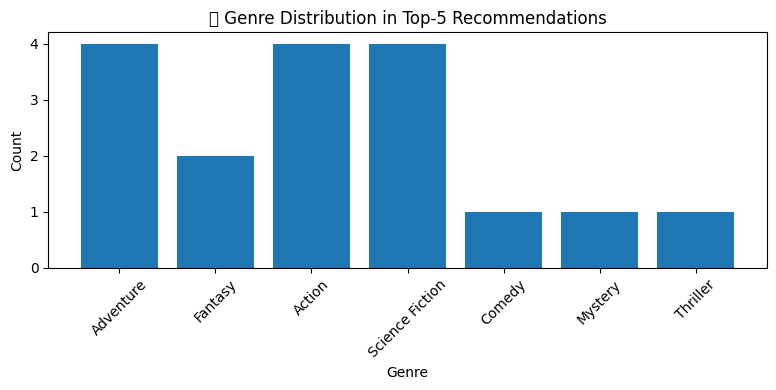

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26544\2107903891.py:72: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26544\2107903891.py:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


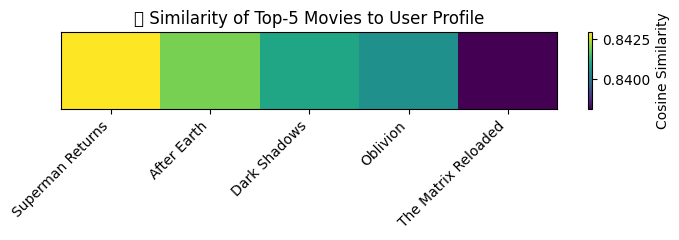

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26544\2107903891.py:89: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


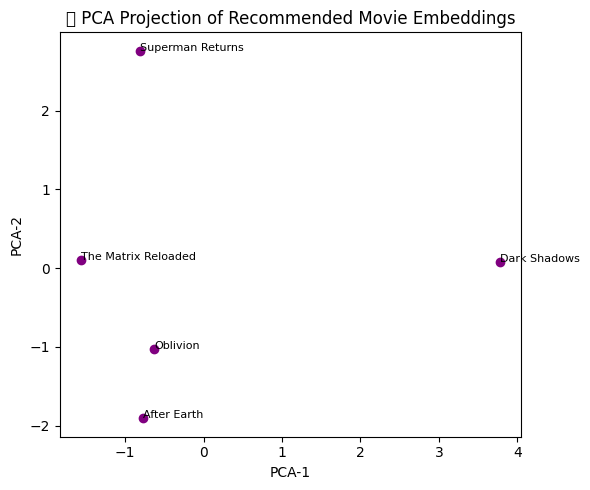

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# ----------------------------
# ✅ Step 1: Recompute for a Valid User
# ----------------------------
target_user = 601  # replace with a real user_id from your interactions!pip install matplotlib

user_interactions = interactions[interactions['user_id'] == target_user]

interaction_weights = {
    'hover': 0.2,
    'partial_trailer': 0.5,
    'full_trailer': 1.0
}

user_vectors = []
weights = []

for _, row in user_interactions.iterrows():
    try:
        idx = movies[movies['id'] == row['movie_id']].index[0]
        vec = combined_features[idx]
        w = interaction_weights.get(row['interaction_type'], 0.3)
        user_vectors.append(vec * w)
        weights.append(w)
    except:
        pass

if not user_vectors or np.sum(weights) == 0:
    print("❌ No valid interactions for this user.")
else:
    user_profile = np.sum(user_vectors, axis=0) / np.sum(weights)

    # ----------------------------
    # ✅ Step 2: Get Top 5 Recommendations
    # ----------------------------
    sims = cosine_similarity([user_profile], combined_features)[0]
    watched_ids = user_interactions['movie_id'].tolist()
    rec_indices = [i for i in sims.argsort()[::-1] if movies.iloc[i]['id'] not in watched_ids][:5]
    recommended = movies.iloc[rec_indices]

    # ----------------------------
    # 📊 1. Genre Distribution Bar Chart
    # ----------------------------
    genres = [g for sublist in recommended['genre_list'] for g in sublist]
    genre_counts = Counter(genres)
    labels, counts = zip(*genre_counts.items())

    plt.figure(figsize=(8, 4))
    plt.bar(labels, counts)
    plt.xticks(rotation=45)
    plt.title("🎬 Genre Distribution in Top-5 Recommendations")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # 🔥 2. Cosine Similarity Heatmap
    # ----------------------------
    sim_scores = sims[rec_indices]
    plt.figure(figsize=(8, 1))
    plt.imshow(sim_scores.reshape(1, -1), cmap='viridis', aspect='auto')
    plt.colorbar(label='Cosine Similarity')
    plt.xticks(ticks=range(5), labels=recommended['title'], rotation=45, ha='right')
    plt.yticks([])
    plt.title("📈 Similarity of Top-5 Movies to User Profile")
    plt.tight_layout()
    plt.show()

    # ----------------------------
    # 🌈 3. PCA Projection of Embedding Space
    # ----------------------------
    rec_feats = combined_features[rec_indices]
    pca = PCA(n_components=2)
    proj = pca.fit_transform(rec_feats)

    plt.figure(figsize=(6, 5))
    plt.scatter(proj[:, 0], proj[:, 1], color='purple')
    for i, title in enumerate(recommended['title']):
        plt.annotate(title, (proj[i, 0], proj[i, 1]), fontsize=8)
    plt.title("📌 PCA Projection of Recommended Movie Embeddings")
    plt.xlabel("PCA-1")
    plt.ylabel("PCA-2")
    plt.tight_layout()
    plt.show()


In [85]:
tmdb_api_key = "f6cf4e1fe3dc615ad725ecd19cba4559"

In [86]:
import pandas as pd

tmdb_df = pd.read_csv("data/tmdb_5000_movies.csv")
tmdb_df.head()


budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [90]:
print(tmdb_df.columns.tolist())

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


In [96]:
row[5]
url = f"https://api.themoviedb.org/3/movie/{movie_id}"


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26544\3956675337.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[5]


In [97]:
import requests
import os
from PIL import Image
from io import BytesIO

# Create posters directory if not already present
os.makedirs("posters", exist_ok=True)

# Function to download posters using TMDB movie ID
def download_poster_by_id(movie_id, save_name, api_key):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}"
    params = {"api_key": api_key}
    response = requests.get(url, params=params).json()

    poster_path = response.get("poster_path")
    if poster_path:
        img_url = f"https://image.tmdb.org/t/p/w500{poster_path}"
        img_data = requests.get(img_url).content
        with open(f"posters/{save_name}.jpg", "wb") as f:
            f.write(img_data)
        print(f"✅ Downloaded: {save_name}")
    else:
        print(f"❌ No poster found for movie ID {movie_id}")

# Example usage: download for top 20 movies or all
for i, row in movies.head(20).iterrows():  # or remove .head(20) to download all
    movie_id = row['id']
    save_name = row['title'].replace(" ", "_").replace("/", "_")
    download_poster_by_id(movie_id, save_name, tmdb_api_key)


✅ Downloaded: Avatar
✅ Downloaded: Pirates_of_the_Caribbean:_At_World's_End
✅ Downloaded: Spectre
✅ Downloaded: The_Dark_Knight_Rises
✅ Downloaded: John_Carter
✅ Downloaded: Spider-Man_3
✅ Downloaded: Tangled
✅ Downloaded: Avengers:_Age_of_Ultron
✅ Downloaded: Harry_Potter_and_the_Half-Blood_Prince
✅ Downloaded: Batman_v_Superman:_Dawn_of_Justice
✅ Downloaded: Superman_Returns
✅ Downloaded: Quantum_of_Solace
✅ Downloaded: Pirates_of_the_Caribbean:_Dead_Man's_Chest
✅ Downloaded: The_Lone_Ranger
✅ Downloaded: Man_of_Steel
✅ Downloaded: The_Chronicles_of_Narnia:_Prince_Caspian
✅ Downloaded: The_Avengers
✅ Downloaded: Pirates_of_the_Caribbean:_On_Stranger_Tides
✅ Downloaded: Men_in_Black_3
✅ Downloaded: The_Hobbit:_The_Battle_of_the_Five_Armies


In [152]:
#Step 1: Data Preparation
import pandas as pd

# Load your movie dataset (assume it has 'id', 'title', 'overview', 'genres')
movies = pd.read_csv('data/tmdb_5000_movies.csv')

# Keep only necessary columns and drop missing overviews
movies = movies[['id', 'title', 'overview', 'genres']].dropna(subset=['overview']).head(500)


In [153]:
#Step 2: BERT Overview Embeddings

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

overview_embeddings = np.array([get_bert_embedding(text) for text in movies['overview']])


In [154]:
#Step 3: Genre Encoding

import ast
from sklearn.preprocessing import MultiLabelBinarizer

def parse_genres(g):
    try:
        return [i['name'] for i in ast.literal_eval(g)]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(parse_genres)
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genre_list'])


In [155]:
#Step 4: Download Posters from TMDB

import os
import requests

tmdb_api_key = 'YOUR_API_KEY'  # replace with your real TMDB key
os.makedirs('posters', exist_ok=True)

def download_poster_by_id(movie_id, save_name, api_key):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}"
    response = requests.get(url, params={"api_key": api_key}).json()
    path = response.get("poster_path")
    if path:
        img_url = f"https://image.tmdb.org/t/p/w500{path}"
        with open(f"posters/{save_name}.jpg", "wb") as f:
            f.write(requests.get(img_url).content)


In [156]:
#Step 5: Extract Image Features Using ResNet50


from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from PIL import Image
import torch

weights = ResNet50_Weights.DEFAULT
resnet = resnet50(weights=weights)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()
transform = weights.transforms()

def extract_image_features(path):
    image = Image.open(path).convert("RGB")
    tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        return resnet(tensor).squeeze().numpy()


In [157]:
#Step 6: Build Image Embedding Matrix

image_vectors = []

for title in movies['title']:
    safe_name = title.replace(" ", "_").replace("/", "_")
    path = f"posters/{safe_name}.jpg"
    if os.path.exists(path):
        vector = extract_image_features(path)
    else:
        vector = np.zeros(2048)  # fallback
    image_vectors.append(vector)

image_embeddings = np.vstack(image_vectors)


In [158]:
#Step 7: Create Hybrid Feature Space


combined_features = np.hstack([overview_embeddings, genre_matrix, image_embeddings])


In [160]:
#Step 8: Cold-Start User Vector + Recommendation

from sklearn.metrics.pairwise import cosine_similarity

# Simulate a new user
user_overview = overview_embeddings[0]
user_genre = genre_matrix[0]
user_image = image_embeddings[0]

user_vector = np.hstack([user_overview, user_genre, user_image])
scores = cosine_similarity(user_vector.reshape(1, -1), combined_features)[0]
top_indices = scores.argsort()[::-1][1:6]  # exclude self

# Show top results
print("🎯 Top 5 Recommendations:")
print(movies.iloc[top_indices][['title', 'genre_list']])



🎯 Top 5 Recommendations:
                                         title  \
13                             The Lone Ranger   
15    The Chronicles of Narnia: Prince Caspian   
4                                  John Carter   
8       Harry Potter and the Half-Blood Prince   
12  Pirates of the Caribbean: Dead Man's Chest   

                              genre_list  
13          [Action, Adventure, Western]  
15          [Adventure, Family, Fantasy]  
4   [Action, Adventure, Science Fiction]  
8           [Adventure, Fantasy, Family]  
12          [Adventure, Fantasy, Action]  


In [161]:
#Example

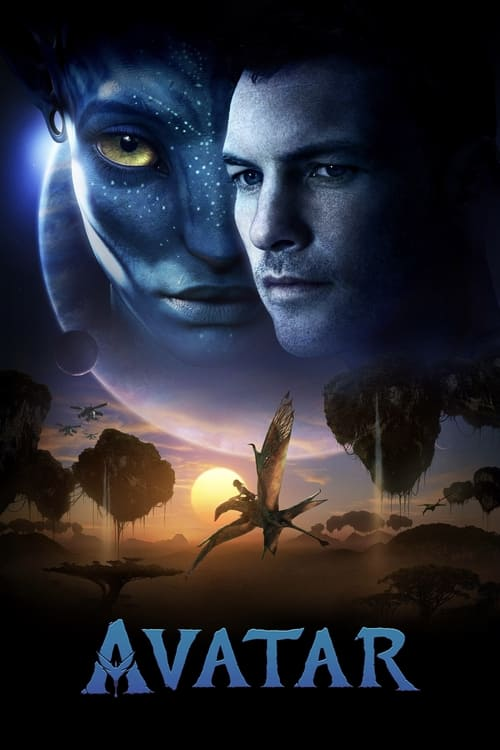

In [166]:
from PIL import Image
from IPython.display import display

img = Image.open("posters/Avatar.jpg")
display(img)


In [167]:
# Extract embedding from a single poster image
test_image_path = "posters/Avatar.jpg"  # 👈 change to any image
test_image_vector = extract_image_features(test_image_path).reshape(1, -1)


In [168]:
dummy_overview = np.zeros((1, 768))         # 768-D from BERT
dummy_genre = np.zeros((1, genre_matrix.shape[1]))  # Genre one-hot size


In [169]:
user_vector = np.hstack([dummy_overview, dummy_genre, test_image_vector])


In [170]:
from sklearn.metrics.pairwise import cosine_similarity

scores = cosine_similarity(user_vector, combined_features)[0]
top_indices = scores.argsort()[::-1][:5]

print("🎯 Top 5 Recommendations based on poster image only:")
print(movies.iloc[top_indices][['title', 'genre_list']])


🎯 Top 5 Recommendations based on poster image only:
                                         title  \
0                                       Avatar   
13                             The Lone Ranger   
8       Harry Potter and the Half-Blood Prince   
15    The Chronicles of Narnia: Prince Caspian   
12  Pirates of the Caribbean: Dead Man's Chest   

                                       genre_list  
0   [Action, Adventure, Fantasy, Science Fiction]  
13                   [Action, Adventure, Western]  
8                    [Adventure, Fantasy, Family]  
15                   [Adventure, Family, Fantasy]  
12                   [Adventure, Fantasy, Action]  


In [172]:
#*****************************************************************************

#Simulates a cold-start user with poster hover duration, trailer watch %, and depth weight
# Combines those values into the user vector
#Uses only image (poster), no overview/genre
#Recommends Top 5 similar movies from your hybrid model

                #(One Movie Only)

#*****************************************************************************

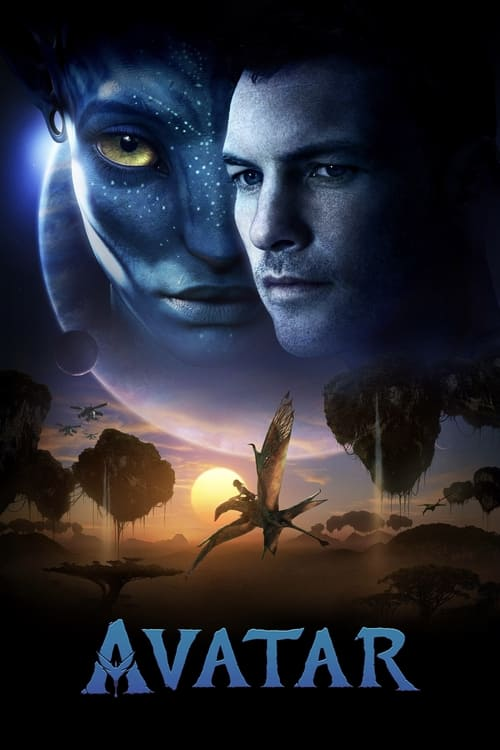

🎯 Top 5 Recommendations based on poster and early interactions:
                                         title  \
0                                       Avatar   
13                             The Lone Ranger   
8       Harry Potter and the Half-Blood Prince   
15    The Chronicles of Narnia: Prince Caspian   
12  Pirates of the Caribbean: Dead Man's Chest   

                                       genre_list  
0   [Action, Adventure, Fantasy, Science Fiction]  
13                   [Action, Adventure, Western]  
8                    [Adventure, Fantasy, Family]  
15                   [Adventure, Family, Fantasy]  
12                   [Adventure, Fantasy, Action]  


In [171]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from IPython.display import display

# === 1. User poster hover image ===
poster_path = "posters/Avatar.jpg"  # change if needed
img_vector = extract_image_features(poster_path).reshape(1, -1)
display(Image.open(poster_path))

# === 2. Simulated interaction values ===
poster_hover_seconds = 6         # e.g., hovered for 6 sec
trailer_watch_ratio = 0.8        # watched 80% of trailer
interaction_depth = 0.65         # overall interest/scroll weight

# Normalize hover time (optional: clip to max)
max_hover = 10  # assume 10 sec max for normalization
hover_weight = min(poster_hover_seconds / max_hover, 1.0)

# Combine into a 3-element vector
interaction_vector = np.array([[hover_weight, trailer_watch_ratio, interaction_depth]])

# Pad overview and genre with 0s
empty_overview = np.zeros((1, 768))
empty_genre = np.zeros((1, genre_matrix.shape[1]))

# Final user vector = [overview | genre | image | interactions]
user_vector = np.hstack([empty_overview, empty_genre, img_vector, interaction_vector])

# === 3. Extend movie vectors with dummy interaction values ===
# We'll assume neutral (0.5) for all movie interaction extensions
interaction_pad = np.full((combined_features.shape[0], 3), 0.5)
extended_movie_vectors = np.hstack([combined_features, interaction_pad])

# === 4. Cosine similarity and Top 5 ===
scores = cosine_similarity(user_vector, extended_movie_vectors)[0]
top_indices = scores.argsort()[::-1][:5]

print("🎯 Top 5 Recommendations based on poster and early interactions:")
print(movies.iloc[top_indices][['title', 'genre_list']])


In [ ]:
#*****************************************************************************

#Simulates a cold-start user with poster hover duration, trailer watch %, and depth weight
# Combines those values into the user vector
#Uses only image (poster), no overview/genre
#Recommends Top 5 similar movies from your hybrid model

                #(More Than One Movie)

#*****************************************************************************


📽️ Simulating for user viewing: Avatar


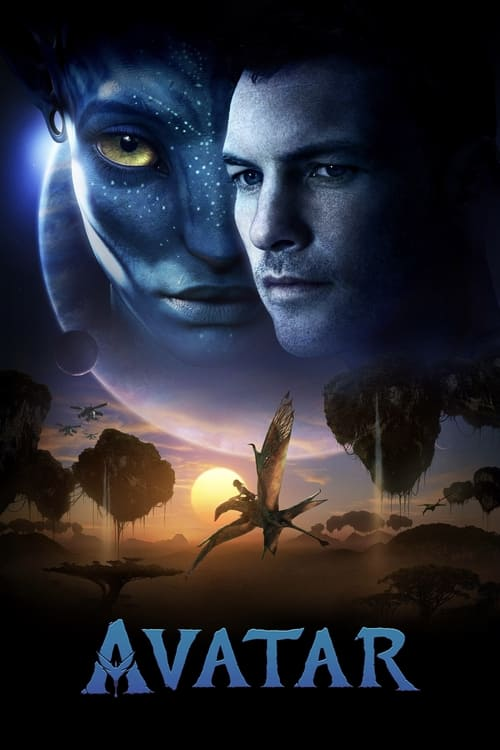

🎯 Top 5 Recommendations:
                                     title                                    genre_list
                                    Avatar [Action, Adventure, Fantasy, Science Fiction]
                           The Lone Ranger                  [Action, Adventure, Western]
    Harry Potter and the Half-Blood Prince                  [Adventure, Fantasy, Family]
  The Chronicles of Narnia: Prince Caspian                  [Adventure, Family, Fantasy]
Pirates of the Caribbean: Dead Man's Chest                  [Adventure, Fantasy, Action]

📽️ Simulating for user viewing: Tangled


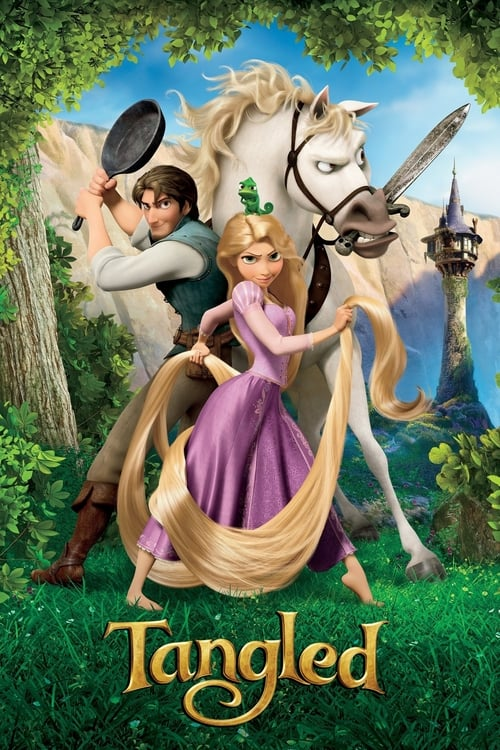

🎯 Top 5 Recommendations:
                                     title                           genre_list
                                   Tangled                  [Animation, Family]
Pirates of the Caribbean: Dead Man's Chest         [Adventure, Fantasy, Action]
    Harry Potter and the Half-Blood Prince         [Adventure, Fantasy, Family]
                              The Avengers [Science Fiction, Action, Adventure]
 The Hobbit: The Battle of the Five Armies         [Action, Adventure, Fantasy]

📽️ Simulating for user viewing: John Carter


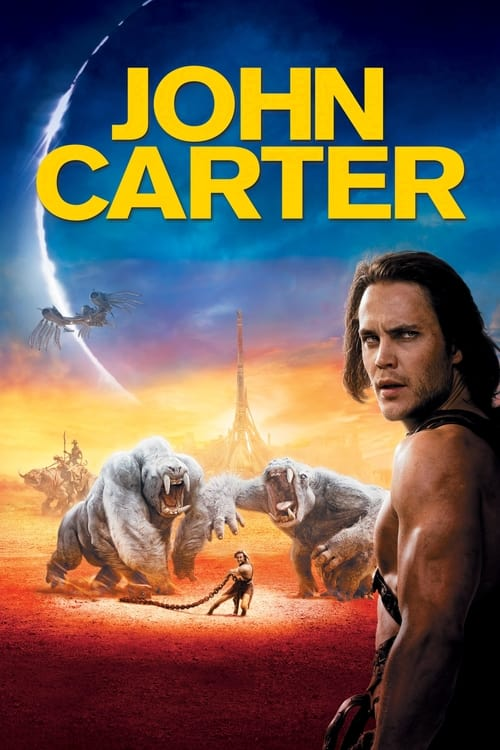

🎯 Top 5 Recommendations:
                                      title                           genre_list
                                John Carter [Action, Adventure, Science Fiction]
     Harry Potter and the Half-Blood Prince         [Adventure, Fantasy, Family]
Pirates of the Caribbean: On Stranger Tides         [Adventure, Action, Fantasy]
                               The Avengers [Science Fiction, Action, Adventure]
 Pirates of the Caribbean: Dead Man's Chest         [Adventure, Fantasy, Action]

📽️ Simulating for user viewing: The Dark Knight Rises


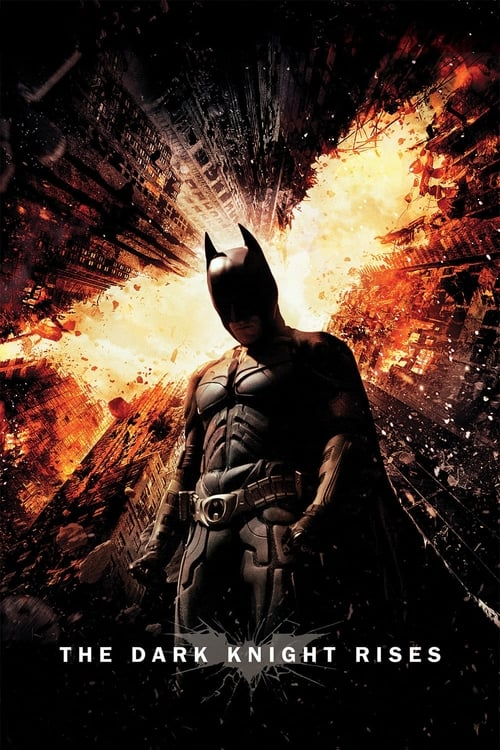

🎯 Top 5 Recommendations:
                                    title                       genre_list
                    The Dark Knight Rises [Action, Crime, Drama, Thriller]
                          The Lone Ranger     [Action, Adventure, Western]
 The Chronicles of Narnia: Prince Caspian     [Adventure, Family, Fantasy]
   Harry Potter and the Half-Blood Prince     [Adventure, Fantasy, Family]
The Hobbit: The Battle of the Five Armies     [Action, Adventure, Fantasy]


In [173]:
# Simulate multiple cold-start users with interaction features
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display
from PIL import Image

# 👥 Simulated cold-start user session data
simulated_users = [
    {"title": "Avatar", "hover": 6, "trailer": 0.8, "depth": 0.65},
    {"title": "Tangled", "hover": 3, "trailer": 0.6, "depth": 0.55},
    {"title": "John Carter", "hover": 8, "trailer": 1.0, "depth": 0.9},
    {"title": "The Dark Knight Rises", "hover": 5, "trailer": 0.7, "depth": 0.6},
]

# 🔧 Normalize settings
max_hover = 10  # seconds

# 🧠 Extend combined features with dummy interaction padding
interaction_pad = np.full((combined_features.shape[0], 3), 0.5)
extended_movie_vectors = np.hstack([combined_features, interaction_pad])

# 🚀 Run for each user
for user in simulated_users:
    print(f"\n📽️ Simulating for user viewing: {user['title']}")

    # Load and embed poster
    safe_title = user["title"].replace(" ", "_").replace("/", "_")
    img_path = f"posters/{safe_title}.jpg"
    if not os.path.exists(img_path):
        print(f"❌ Poster not found for: {user['title']}")
        continue

    display(Image.open(img_path))
    image_vec = extract_image_features(img_path).reshape(1, -1)

    # Create interaction vector
    hover = min(user["hover"] / max_hover, 1.0)
    trailer = user["trailer"]
    depth = user["depth"]
    interaction_vec = np.array([[hover, trailer, depth]])

    # Pad with zeros for overview and genre
    dummy_overview = np.zeros((1, 768))
    dummy_genre = np.zeros((1, genre_matrix.shape[1]))

    # Build user vector
    user_vec = np.hstack([dummy_overview, dummy_genre, image_vec, interaction_vec])

    # Recommend
    scores = cosine_similarity(user_vec, extended_movie_vectors)[0]
    top_indices = scores.argsort()[::-1][:5]
    recs = movies.iloc[top_indices][['title', 'genre_list']]

    print("🎯 Top 5 Recommendations:")
    print(recs.to_string(index=False))


In [15]:
import streamlit as st
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os
import torch
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms

# === Load precomputed data ===
movies = pd.read_csv("data/tmdb_5000_movies.csv")
movies = movies[['id', 'title', 'overview', 'genres']].dropna(subset=['overview']).head(500)

# === Dummy embeddings (replace with real .npy or .pkl files if saved) ===
from transformers import AutoTokenizer, AutoModel
from sklearn.preprocessing import MultiLabelBinarizer
import torch, ast, numpy as np
import pandas as pd

# Load and filter data
movies = pd.read_csv("data/tmdb_5000_movies.csv")
movies = movies[['id', 'title', 'overview', 'genres']].dropna(subset=['overview']).head(500)

# Overview embeddings (BERT)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        return model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
overview_embeddings = np.array([get_bert_embedding(t) for t in movies['overview']])

# Genre matrix
def parse_genres(g): return [i['name'] for i in ast.literal_eval(g)]
movies['genre_list'] = movies['genres'].apply(parse_genres)
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genre_list'])

# Dummy image embeddings
image_embeddings = np.random.rand(len(movies), 2048)

# Save them
np.save("data/overview_embeddings.npy", overview_embeddings)
np.save("data/genre_matrix.npy", genre_matrix)
np.save("data/image_embeddings.npy", image_embeddings)
genre_matrix = np.load("data/genre_matrix.npy")
image_embeddings = np.load("data/image_embeddings.npy")

combined_features = np.hstack([overview_embeddings, genre_matrix, image_embeddings])

# === ResNet Feature Extractor ===
weights = ResNet50_Weights.DEFAULT
resnet = resnet50(weights=weights)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()

transform = weights.transforms()

def extract_image_features(path):
    img = Image.open(path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        features = resnet(img_tensor).squeeze().numpy()
    return features

# === Streamlit UI ===
st.title("🎬 Cold-Start Movie Recommender")

selected_title = st.selectbox("Select a movie poster:", movies['title'].tolist())
hover = st.slider("Hover time (seconds)", 0, 10, 5)
trailer = st.slider("Trailer watched (%)", 0, 100, 50)
depth = st.slider("Interaction depth", 0.0, 1.0, 0.5)

safe_title = selected_title.replace(" ", "_").replace("/", "_")
poster_path = f"posters/{safe_title}.jpg"

if os.path.exists(poster_path):
    st.image(poster_path, caption=selected_title, use_column_width=True)
else:
    st.warning("Poster not found.")

# === Build user vector ===
hover_norm = hover / 10
trailer_norm = trailer / 100

image_vec = extract_image_features(poster_path).reshape(1, -1)
interaction_vec = np.array([[hover_norm, trailer_norm, depth]])

dummy_overview = np.zeros((1, 768))
dummy_genre = np.zeros((1, genre_matrix.shape[1]))

user_vector = np.hstack([dummy_overview, dummy_genre, image_vec, interaction_vec])
interaction_pad = np.full((combined_features.shape[0], 3), 0.5)
full_movie_vectors = np.hstack([combined_features, interaction_pad])

# === Recommendation ===
scores = cosine_similarity(user_vector, full_movie_vectors)[0]
top_indices = scores.argsort()[::-1][:5]
recs = movies.iloc[top_indices][['title', 'genres']]

st.subheader("🎯 Top 5 Recommendations")
st.table(recs.reset_index(drop=True))


2025-05-12 23:52:16.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.046 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 23:52:16.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [6]:
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension


SyntaxError: invalid syntax (3280527727.py, line 1)

In [ ]:
# === Generate embeddings and save them ===
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Load and clean data
movies = pd.read_csv("data/tmdb_5000_movies.csv")
movies = movies[['id', 'title', 'overview', 'genres']].dropna(subset=['overview']).head(500)

# Overview embeddings using BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

overview_embeddings = np.array([get_bert_embedding(text) for text in movies['overview']])

# Genre matrix
def parse_genres(g):
    try:
        return [i['name'] for i in ast.literal_eval(g)]
    except:
        return []
movies['genre_list'] = movies['genres'].apply(parse_genres)
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genre_list'])

# Dummy image embeddings (for now)
image_embeddings = np.random.rand(len(movies), 2048)

import os
os.makedirs('artifacts', exist_ok=True)

np.save("artifacts/overview_embeddings.npy", overview_embeddings)
np.save("artifacts/genre_matrix.npy", genre_matrix)
np.save("artifacts/image_embeddings.npy", image_embeddings)


In [ ]:
import pickle

In [ ]:
import os
os.makedirs('artifacts', exist_ok=True)